<a href="https://colab.research.google.com/github/RMCV-Rajapaksha/TeamInception_Datathon/blob/main/task2_data_preprocessing_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 Notebook for "insert model name here"


## Imports and Setup

**Import the Libararies**


In [1]:
import pandas as pd
import os
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

### Connecting to Google Drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


### Reading data set files

In [3]:
# Developers please update the paths according to were in your google you place datasets
# i recommend making Rootcode-ML folder and in it Datasets folder and placing the csv files there then you wont have to change below code block
bookings_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/bookings_train.csv')
tasks_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/tasks.csv')
staffing_data = pd.read_csv('/content/drive/MyDrive/Rootcode-ML/Datasets/staffing_train.csv')

In [4]:
bookings_data.head()

,booking_id,citizen_id,booking_date,appointment_date,appointment_time,check_in_time,check_out_time,task_id,num_documents,queue_number,satisfaction_rating
0,f7b59ba3793fea61282cb02be2247cebd0a75306,4229044420,2021-01-01,2021-01-01,09:03,2021-01-01 09:11:00,2021-01-01 09:48:15.166353269,TASK-002,0,2,4
1,cfe30d53b4b645e4cb6b114f6c9d74a0f25e6a80,5389442635,2021-01-01,2021-01-01,09:12,2021-01-01 09:24:00,2021-01-01 10:24:12.189261137,TASK-001,1,1,4
2,0fb0a5d9b3944dd743a9e7828dc03fa74aa6ebf8,2123783919,2021-01-01,2021-01-01,09:36,2021-01-01 09:29:00,2021-01-01 10:26:48.802260864,TASK-002,1,6,5
3,d4bf826153212fa325ad98b215668ab942365607,6359918966,2021-01-01,2021-01-01,09:45,2021-01-01 10:07:00,2021-01-01 11:00:13.485642822,TASK-001,1,4,4
4,ebb4c9687acbaf65376d8e379bd1341d1c15127e,178732202,2021-01-01,2021-01-01,10:12,2021-01-01 10:26:00,2021-01-01 11:54:53.260180213,TASK-002,1,8,3


## EDA


### EDA of Bookings data

lets take a look at the columns and some of their values

In [5]:
staffing_data.head()

,date,section_id,employees_on_duty,total_task_time_minutes
0,2021-01-01,SEC-001,1,834.569483
1,2021-01-01,SEC-002,4,1525.368990
2,2021-01-01,SEC-003,2,662.095279
3,2021-01-01,SEC-004,4,1499.112620
4,2021-01-01,SEC-005,3,1238.533073


In [6]:
staffing_data.describe()

,employees_on_duty,total_task_time_minutes
count,5802.000000,5802.000000
mean,4.458807,1662.296769
std,2.794417,1147.134643
min,1.000000,91.109596
25%,3.000000,859.104314
50%,4.000000,1358.176924
75%,6.000000,2123.936358
max,26.000000,10658.173092


removing unnecessary columns. We wont need the total_task_time_minutes because this data wont be provided as input from the test datasets. We need the date and section_id  because they will be to calculate the actual target value (the thing to be predicted) for task 2.

In [7]:
staffing_data = staffing_data.drop(['total_task_time_minutes'],axis=1)

now lets look at the new table headers again.


In [8]:
staffing_data.head()

,date,section_id,employees_on_duty
0,2021-01-01,SEC-001,1
1,2021-01-01,SEC-002,4
2,2021-01-01,SEC-003,2
3,2021-01-01,SEC-004,4
4,2021-01-01,SEC-005,3


lets get a better idea of how null values have been distributed amoung the columns

In [9]:
staffing_data.isna().sum()

,0
date,0
section_id,0
employees_on_duty,0


## Data Preprocessing


### Rearrangement and processing of columns

### Dataset seperation according to section_id

In [10]:
task_counts = staffing_data.groupby("section_id").size().reset_index(name="count")
task_counts

,section_id,count
0,SEC-001,967
1,SEC-002,967
2,SEC-003,967
3,SEC-004,967
4,SEC-005,967
5,SEC-006,967


Sort the data according to the dates

In [26]:
staffing_data = staffing_data.sort_values(by='date')

Traning and test split

In [27]:
staffing_data = staffing_data.sort_values(by='date')
split_index = int(len(staffing_data) * 0.8)
train_staffing_data = staffing_data.iloc[:split_index]
test_staffing_data = staffing_data.iloc[split_index:]

Training data shape


In [21]:
train_staffing_data.shape

(4641, 3)

Testing data shape

In [22]:
test_staffing_data.shape

(1161, 3)

Training data shape

In [25]:
train_staffing_data.isna().sum()

,0
date,0
section_id,0
employees_on_duty,0


Minimum employees on duty

In [30]:
min_employees = staffing_data['employees_on_duty'].min()
min_employees

1

Maximum employees on duty

In [31]:
max_employees = staffing_data['employees_on_duty'].max()
max_employees

26

Remove outliers

Number of outliers: 223
Outliers:


,date,section_id,employees_on_duty
5,2021-01-01,SEC-006,11
34,2021-01-08,SEC-005,11
41,2021-01-11,SEC-006,15
46,2021-01-12,SEC-005,15
47,2021-01-12,SEC-006,11
...,...,...,...
5608,2024-11-13,SEC-005,18
5728,2024-12-12,SEC-005,13
5734,2024-12-13,SEC-005,13
5770,2024-12-23,SEC-005,16


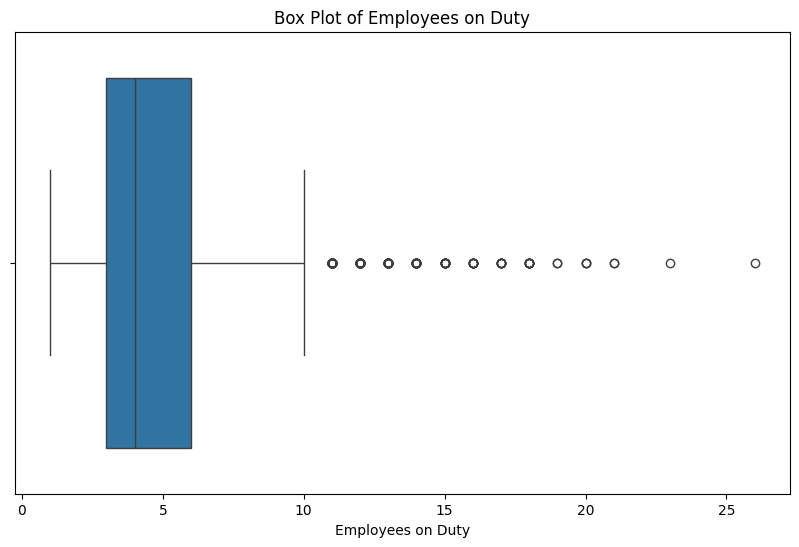

In [71]:
# Calculate Q1, Q3, and IQR
Q1 = staffing_data['employees_on_duty'].quantile(0.25)
Q3 = staffing_data['employees_on_duty'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = staffing_data[(staffing_data['employees_on_duty'] < lower_bound) | (staffing_data['employees_on_duty'] > upper_bound)]

print(f"Number of outliers: {len(outliers)}")
print("Outliers:")
display(outliers)

# Create a box plot to visualize outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=staffing_data['employees_on_duty'])
plt.title('Box Plot of Employees on Duty')
plt.xlabel('Employees on Duty')
plt.show()

scale the 'employees_on_duty' column in the training data using Min-Max scaling.

In [34]:
# Initialize the scaler
scaler = MinMaxScaler()

# Reshape the column for scaling
employees_on_duty_train = train_staffing_data['employees_on_duty'].values.reshape(-1, 1)

# Fit and transform the training data on a copy of the slice
train_staffing_data.loc[:, 'employees_on_duty_scaled'] = scaler.fit_transform(employees_on_duty_train)

# Display the first few rows with the new scaled column
display(train_staffing_data.head())

,date,section_id,employees_on_duty,employees_on_duty_scaled
0,2021-01-01,SEC-001,1,0.00
1,2021-01-01,SEC-002,4,0.12
2,2021-01-01,SEC-003,2,0.04
3,2021-01-01,SEC-004,4,0.12
4,2021-01-01,SEC-005,3,0.08


Feature Engineering

In [35]:
def create_time_series_features(df, date_column):
    """Creates time-series features from a datetime column."""
    df[date_column] = pd.to_datetime(df[date_column])
    df['day_of_week'] = df[date_column].dt.dayofweek
    df['month'] = df[date_column].dt.month
    df['year'] = df[date_column].dt.year
    df['quarter'] = df[date_column].dt.quarter
    df['day_of_year'] = df[date_column].dt.dayofyear
    df['day_of_month'] = df[date_column].dt.day
    df['week_of_year'] = df[date_column].dt.isocalendar().week.astype(int)
    df['is_weekend'] = (df[date_column].dt.dayofweek >= 5).astype(int)
    return df

In [37]:
employees_on_duty_train=create_time_series_features(train_staffing_data, 'date')

/tmp/ipython-input-2126531055.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[date_column] = pd.to_datetime(df[date_column])
/tmp/ipython-input-2126531055.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_of_week'] = df[date_column].dt.dayofweek
/tmp/ipython-input-2126531055.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

In [38]:
employees_on_duty_train

,date,section_id,employees_on_duty,employees_on_duty_scaled,day_of_week,month,year,quarter,day_of_year,day_of_month,week_of_year,is_weekend
0,2021-01-01,SEC-001,1,0.00,4,1,2021,1,1,1,53,0
1,2021-01-01,SEC-002,4,0.12,4,1,2021,1,1,1,53,0
2,2021-01-01,SEC-003,2,0.04,4,1,2021,1,1,1,53,0
3,2021-01-01,SEC-004,4,0.12,4,1,2021,1,1,1,53,0
4,2021-01-01,SEC-005,3,0.08,4,1,2021,1,1,1,53,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4636,2024-03-11,SEC-005,5,0.16,0,3,2024,1,71,11,11,0
4637,2024-03-11,SEC-006,10,0.36,0,3,2024,1,71,11,11,0
4638,2024-03-12,SEC-001,2,0.04,1,3,2024,1,72,12,11,0
4639,2024-03-12,SEC-002,5,0.16,1,3,2024,1,72,12,11,0


In [70]:
# Ensure 'section_id' is in employees_on_duty_train before one-hot encoding
if 'section_id' not in employees_on_duty_train.columns:
    # Re-split the data to ensure train_staffing_data has 'section_id'
    staffing_data = staffing_data.sort_values(by='date')
    split_index = int(len(staffing_data) * 0.8)
    train_staffing_data = staffing_data.iloc[:split_index].copy()
    test_staffing_data = staffing_data.iloc[split_index:].copy()

    # Merge with train_staffing_data to get the 'section_id' column
    employees_on_duty_train = employees_on_duty_train.merge(train_staffing_data[['date', 'section_id']], on='date', how='left')

employees_on_duty_train = pd.get_dummies(employees_on_duty_train, columns=['section_id'], prefix='section')
display(employees_on_duty_train.head())

,date,employees_on_duty,employees_on_duty_scaled,day_of_week,month,year,quarter,day_of_year,day_of_month,week_of_year,...,section_SEC-003,section_SEC-004,section_SEC-005,section_SEC-006,section_SEC-001,section_SEC-002,section_SEC-003,section_SEC-004,section_SEC-005,section_SEC-006
0,2021-01-01,1,0.0,4,1,2021,1,1,1,53,...,False,False,False,False,True,False,False,False,False,False
1,2021-01-01,1,0.0,4,1,2021,1,1,1,53,...,False,False,False,False,False,True,False,False,False,False
2,2021-01-01,1,0.0,4,1,2021,1,1,1,53,...,False,False,False,False,False,False,True,False,False,False
3,2021-01-01,1,0.0,4,1,2021,1,1,1,53,...,False,False,False,False,False,False,False,True,False,False
4,2021-01-01,1,0.0,4,1,2021,1,1,1,53,...,False,False,False,False,False,False,False,False,True,False
